# Task 4: To Explore Business Analytics

### Given Data is of a SuperStore.
Problem Statement:
* To perform ‘Exploratory Data Analysis’ on the dataset ‘SampleSuperstore’.
* As a business manager, we need to find out the weak areas, where one can work to make more profit.
* What all business problems we can derive by exploring the data?

# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# Loading the Data

In [3]:
#Loading the data from csv file
data=pd.read_csv("SampleSuperstore.csv")

In [4]:
#Getting first 5 rows of the data
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

# Preparing the Data

#### Let's check if there is any duplicate data present:


In [6]:
duplicate=data[data.duplicated()]
print(f"{duplicate.shape[0]} duplicate rows found")

17 duplicate rows found


In [7]:
#To delete the duplicate rows, while keeping first occurence
data.drop_duplicates(keep='first',inplace=True)
data.shape

(9977, 13)

*Phew!*

In [8]:
data.info()#to get dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


*We have no null values in the data.*

In [9]:
data['Country'].unique()

array(['United States'], dtype=object)

* The SuperStore is located at the United States. 
* All data we have is the online *sales data* of the store.

In [10]:
#Drop unecessary columns
#1.Postal code will tell about the city only, which we anyways have.
#2.Country: Same(i.e. United States) for all data
data.drop(['Postal Code','Country'],axis=1,inplace=True)

In [11]:
data.head(1) 

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136


*Good to Go!*

# Exploratory Data Analysis

## Univariate Analysis

### 1. Categorical Features

In [12]:
#Getting all categorical variables
data_categorical=[]
for col in data.columns:
    if data[col].dtype=="object" and data[col].nunique()<8:
        data_categorical.append(col)
data_categorical

['Ship Mode', 'Segment', 'Region', 'Category']

In [13]:
data_categorical=data[data_categorical]

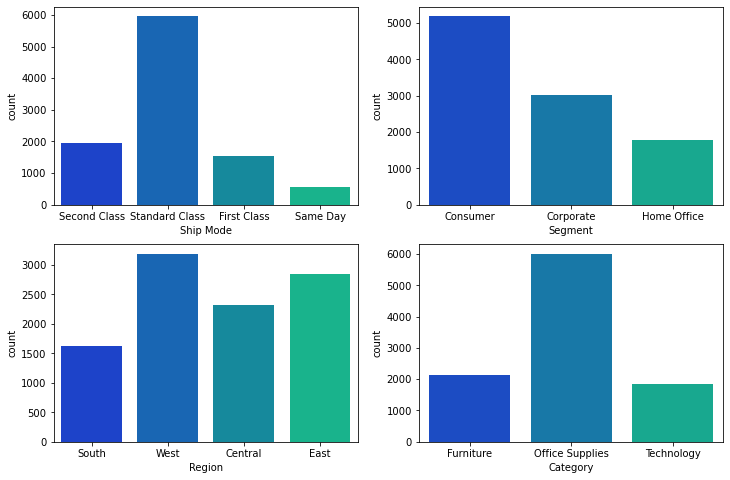

In [14]:
#Countplot for all categorical variables
plt.figure(figsize=(12,8))
for i,col in enumerate(data_categorical.columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data_categorical[col],palette="winter")

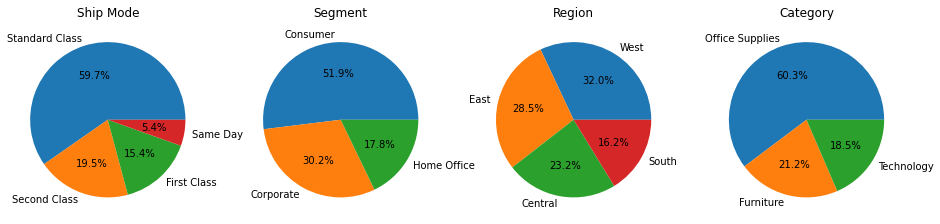

In [15]:
#Distribution of all categories in our data
plt.figure(figsize=(16,4))
for i,col in enumerate(data_categorical.columns,1):
    plt.subplot(1,4,i)
    plt.pie(data_categorical[col].value_counts(),labels=data_categorical[col].value_counts().index,autopct="%.1f%%")
    plt.title(col)

#### There are a few other categorical features, but those are high cardinaliity features (with a lot of unique values). This includes: 
* Sub-Category
* City
* State

We'll plot them separately, as top 10 by count, bottom 5 by count.

In [16]:
#To check sub-category in each categories using groupby()
pd.set_option('display.max_colwidth',-1)
data.groupby(['Category'])['Sub-Category'].unique()

Category
Furniture          [Bookcases, Chairs, Tables, Furnishings]                                          
Office Supplies    [Labels, Storage, Art, Binders, Appliances, Paper, Envelopes, Fasteners, Supplies]
Technology         [Phones, Accessories, Machines, Copiers]                                          
Name: Sub-Category, dtype: object

* There are 3 categories of items in our sales data: Furniture, Office Supplies & Technology.
* Also, each category of products have a number of sub-categories.

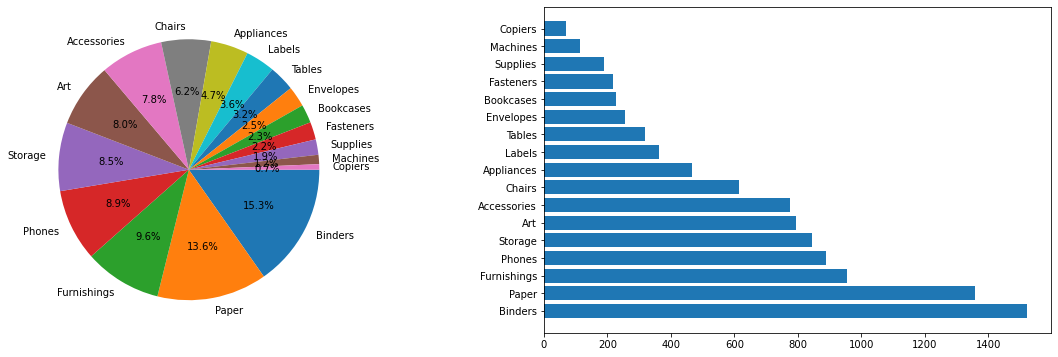

In [17]:
#To get the countplot for Sub-categories 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.pie(data['Sub-Category'].value_counts(),labels=data['Sub-Category'].value_counts().index,autopct="%.1f%%",counterclock=False)
plt.subplot(1,2,2)
plt.barh(data['Sub-Category'].value_counts().index,data['Sub-Category'].value_counts())
plt.show()

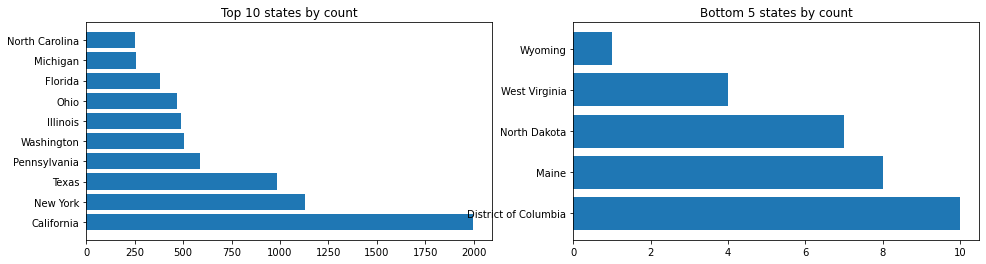

In [18]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Top 10 states by count")
plt.barh(data['State'].value_counts().head(10).index,data['State'].value_counts().head(10))
plt.subplot(1,2,2)
plt.title("Bottom 5 states by count")
plt.barh(data['State'].value_counts().tail(5).index,data['State'].value_counts().tail(5))
plt.show()

<BarContainer object of 5 artists>

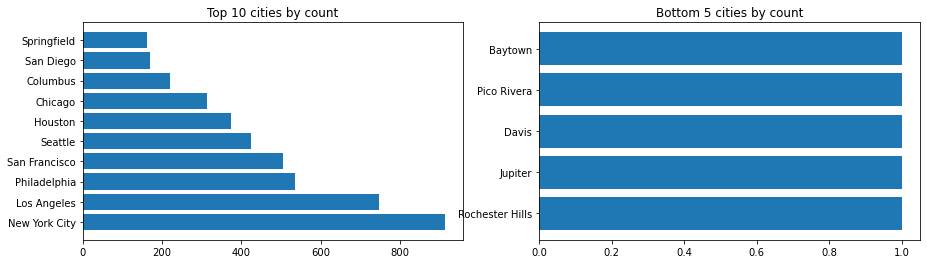

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("Top 10 cities by count")
plt.barh(data['City'].value_counts().head(10).index,data['City'].value_counts().head(10))
plt.subplot(1,2,2)
plt.title("Bottom 5 cities by count")
plt.barh(data['City'].value_counts().tail(5).index,data['City'].value_counts().tail(5))

### 2. Numerical Features

In [20]:
#Getting all numerical variables
data_numerical=[]
for col in data.columns:
    if data[col].dtype!="object":
        data_numerical.append(col)
data_numerical

['Sales', 'Quantity', 'Discount', 'Profit']

In [21]:
data_numerical=data[data_numerical]

#### Let's get the statistical data --->

In [22]:
data_numerical.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


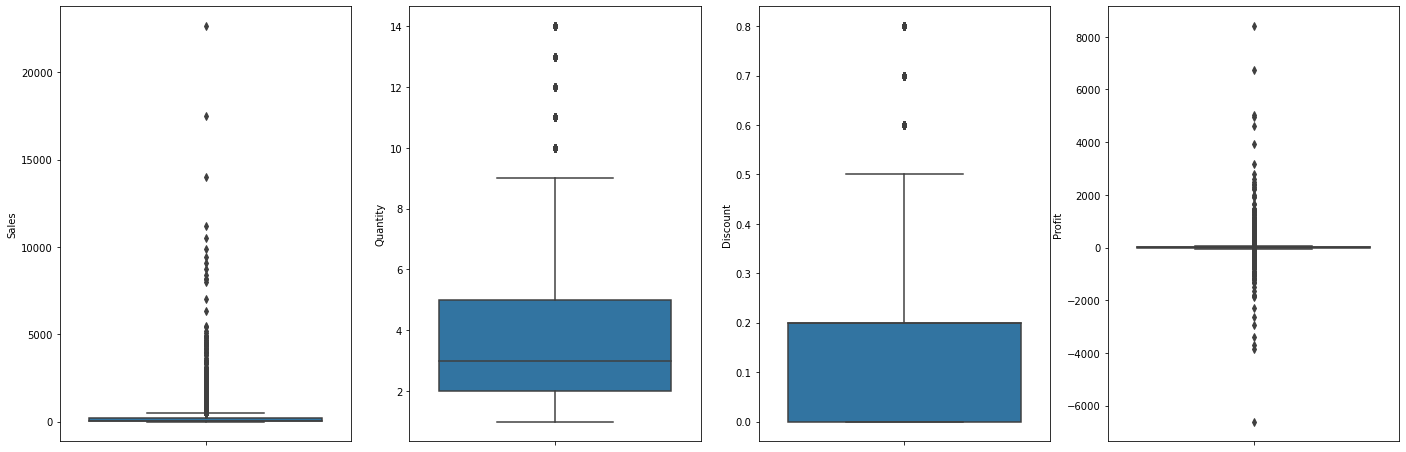

In [23]:
#Visualizing how numerical variables are distributed using boxplot() from seaborn
plt.figure(figsize=(24,8))
for i,col in enumerate(data_numerical.columns,1):
    plt.subplot(1,4,i)
    sns.boxplot(data_numerical[col],orient='v')

In [24]:
#To get the skewness
data_numerical.skew()

Sales       12.963770
Quantity    1.276709 
Discount    1.683386 
Profit      7.554748 
dtype: float64

* Sales & Profit are highly skewed. 
* Quantity & Profit have only a few outliers.

**Although, there are lot of outliers in Profit & Sales; if we treat them, we may lose some valuable data.**


## Bivariate Analysis

In [25]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

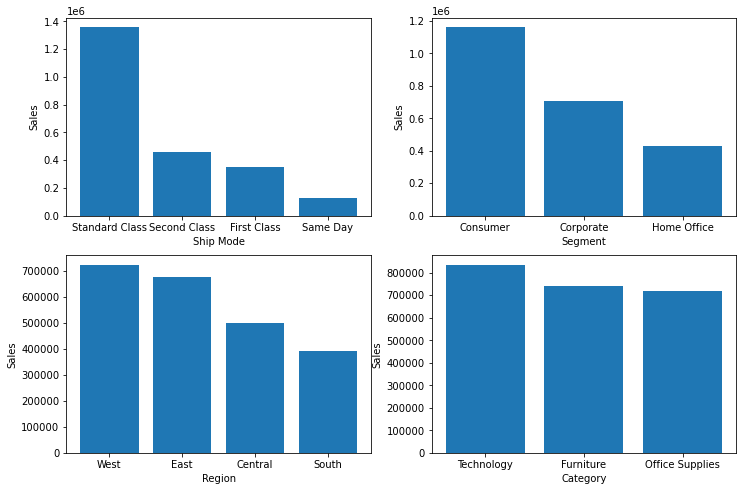

In [26]:
#Plotting SALES Vs every categorical variable
plt.figure(figsize=(12,8))
for i,col in enumerate(data_categorical,1):
    plt.subplot(2,2,i)
    grp=data.groupby(col).sum()['Sales'].sort_values(ascending=False)
    plt.bar(grp.index,grp)
    plt.xlabel(col)
    plt.ylabel("Sales")

# Key Observations:
* People in western part of US tend to order more.
* We have more customers buying Office Supplies(binders/papers) & also Furnishing (as seen in countplot).
* Sales report of technology & furniture products are high due to their high selling price compared to others.

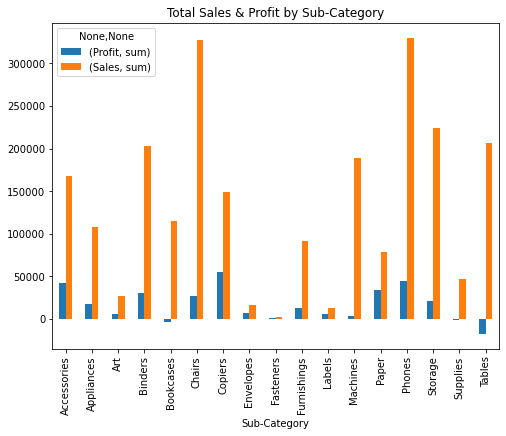

In [27]:
#Plotting Total Sales & Profit vs Sub-Category
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(8,6))
plt.title("Total Sales & Profit by Sub-Category")
plt.show()

* Highest Profit is earned in selling Copiers. 
* The SP of Phones & Chairs is extremely high as compared to other products.
* People do not tend to buy tables, bookcases, supplies online from this SuperStore as these are in losses.

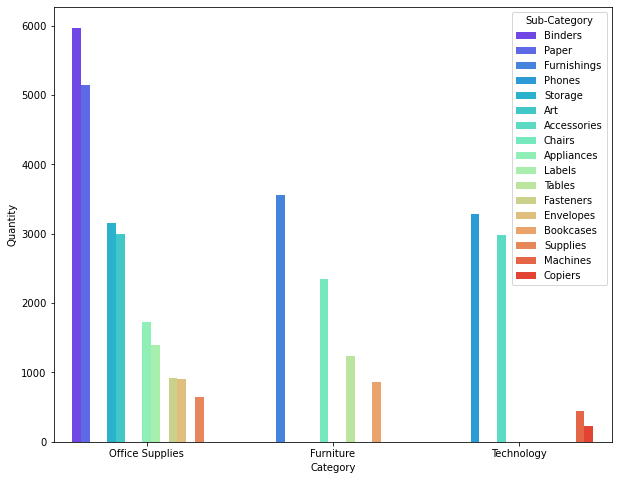

In [28]:
#Top products sold by quantity
grp=data.groupby(['Category','Sub-Category']).sum()['Quantity'].reset_index().sort_values('Quantity',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x="Category",y="Quantity",hue="Sub-Category",data=grp,palette='rainbow')

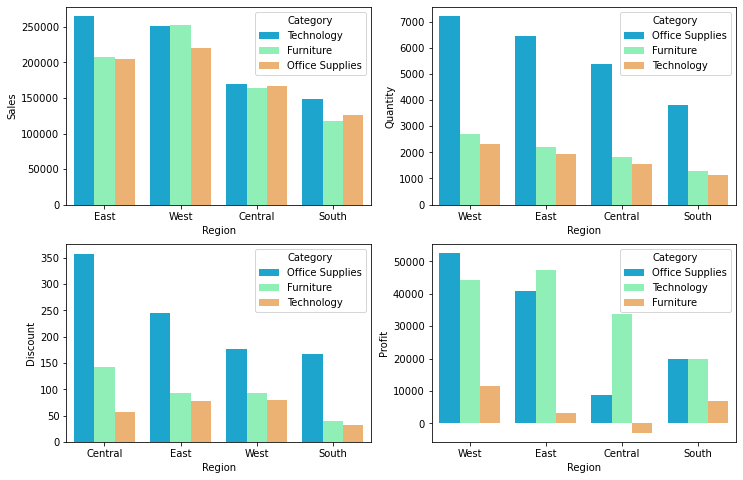

In [29]:
#Regionwise report for all numerical features
plt.figure(figsize=(12,8))
for i, col in enumerate(data_numerical,1):
    grp2=data.groupby(['Region','Category']).sum()[col].reset_index().sort_values(col,ascending=False)
    plt.subplot(2,2,i)
    sns.barplot(x="Region",y=col,hue="Category",data=grp2,palette='rainbow')

#### Even if, Central region is giving high discounts, the push(quantity sold/sales) is average due to which it is showing losses.

In [30]:
#Creating a column Profit%
data['Profit%']=data['Profit']*100/(data['Sales']-data['Profit'])

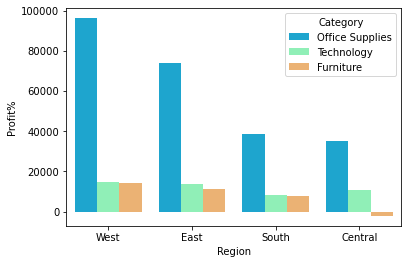

In [31]:
#Profit% vs Region
grp3=data.groupby(['Region','Category']).sum()["Profit%"].reset_index().sort_values('Profit%',ascending=False)
sns.barplot(x="Region",y="Profit%",hue="Category",data=grp3,palette='rainbow')

### So, for losses in central region:
* SuperStore should market their Furniture category products well & stress in this region to recover/ makeup losses.
* Reduce the heavy discounts they are giving here/ sell at marked price to bring back at Profit=0 (for Office Supplies & Furniture products) as the **investments are not fruitful here**

#### Studying profit, profit % by sub-category may give additional insights:

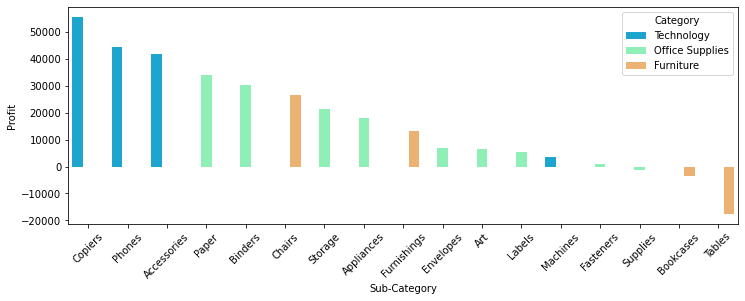

In [32]:
plt.figure(figsize=(12,4))
grp4=data.groupby(['Category','Sub-Category']).sum()["Profit"].reset_index().sort_values('Profit',ascending=False)
sns.barplot(x="Sub-Category",y="Profit",hue="Category",data=grp4,palette='rainbow')
plt.xticks(rotation=45)
plt.show()

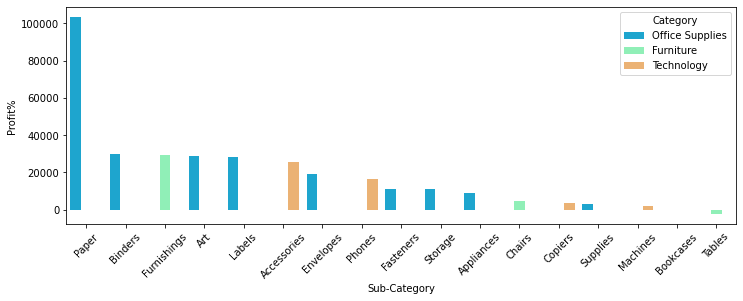

In [33]:
plt.figure(figsize=(12,4))
grp4=data.groupby(['Category','Sub-Category']).sum()["Profit%"].reset_index().sort_values('Profit%',ascending=False)
sns.barplot(x="Sub-Category",y="Profit%",hue="Category",data=grp4,palette='rainbow')
plt.xticks(rotation=45)
plt.show()

### Key Observations:
* As inferred earlier, there were few losses for Furniture products. 
* These products are bookcases & tables. Other underperforming products include Supplies(Office Supplies), Machines(Technology)
* Also, some top performing products are Papers& Binders(Office Supplies), Furnishings(Furniture), Accessories(Technology)

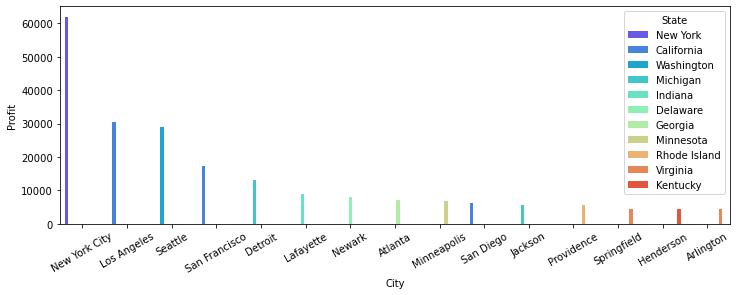

In [34]:
#Checking cities for which profit is highest
plt.figure(figsize=(12,4))
grp5=data.groupby(['State','City']).sum()["Profit"].reset_index().sort_values('Profit',ascending=False).head(15)
sns.barplot(x="City",y="Profit",hue="State",data=grp5,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

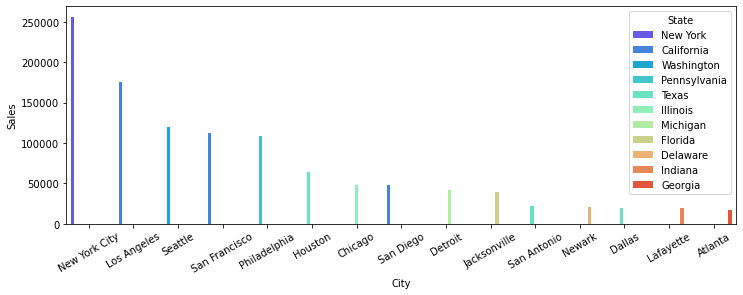

In [35]:
#Checking cities having highest sales
plt.figure(figsize=(12,4))
grp5=data.groupby(['State','City']).sum()["Sales"].reset_index().sort_values('Sales',ascending=False).head(15)
sns.barplot(x="City",y="Sales",hue="State",data=grp5,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

#### The stats above are very pleasing. In all these 15 cities, the sales & profit is quite good. 
Hence, we can invest more in these cities(in terms of providing discounts, etc) to increase the business. These cities can be called **HotSpots**.

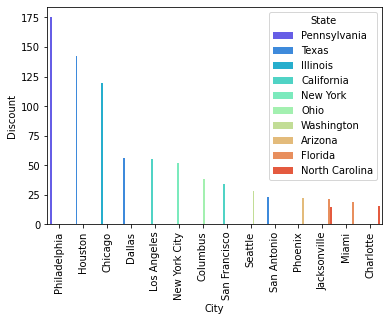

In [36]:
#Checking cities for which Superstore has highest discounts
sns.barplot(x="City",y="Discount",hue="State",data=data.groupby(['State','City']).sum()["Discount"].reset_index().sort_values('Discount',ascending=False).head(15),palette='rainbow')
plt.xticks(rotation=90)
plt.show()

It is suprising that for few cities like *Philadelphia*, *Houston*, Dallas, eventhough our store is giving highest discounts; the sales or profit is nominal and not in our Hotspots list.

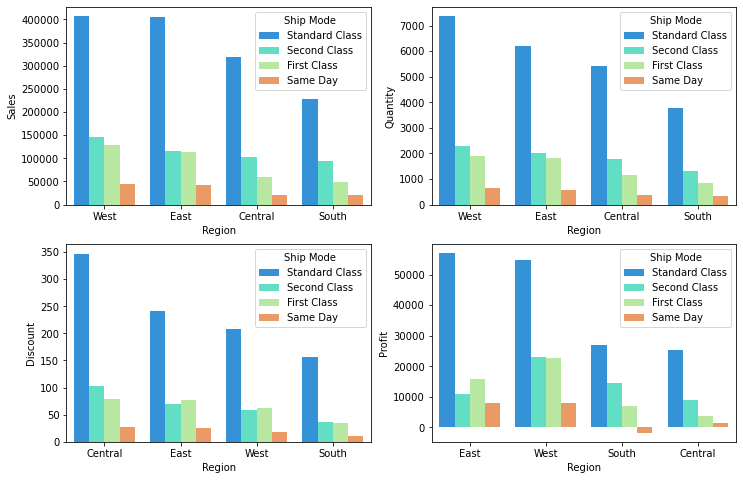

In [37]:
#Regionwise Shipping Mode Analysis
plt.figure(figsize=(12,8))
for i, col in enumerate(data_numerical,1):
    plt.subplot(2,2,i)
    sns.barplot(x="Region",y=col,hue="Ship Mode",data=data.groupby(['Region','Ship Mode']).sum()[col].reset_index().sort_values(col,ascending=False),palette='rainbow')

#### Similar trends found in total Quantity sold/Sales/Profit by ship mode for all regions.
* The standard class of delivery has maximum count of quantity sold and in turn makes highest profit, followed by Second class & First Class.
* The Same day delivery makes the least profit (with losses in South) and also not preferred mode of delivery by customers.
* It is observed that customers are not willing to prefer extra amount for same day delivery, instead, they go with Standard Class shipping.

### Plotting a correlation heatmap

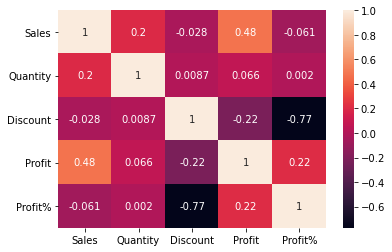

In [38]:
sns.heatmap(data.corr(),annot=True)

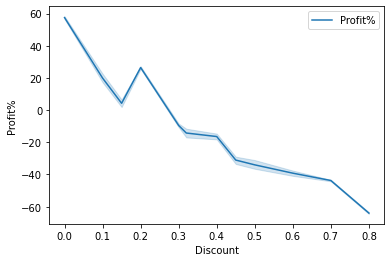

In [42]:
sns.lineplot(x="Discount",y="Profit%",label="Profit%",data=data)
plt.legend()
plt.show()

##### Profit & discount have the least correlation. 
It's high time for our SuperStore to revise its discounts strategically. Phew!

